In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sps

In [2]:
df_Induction = pd.read_csv('../CSV_files/IFN Induction Genes.csv')
df_ISG= pd.read_csv('../CSV_files/ISGs.csv')

In [5]:
df_Induction.columns, df_ISG.columns = ['ID','Nseqs','M0','TreeL','P-val','2dLNL','M8'], ['ID','Nseqs','M0','TreeL','P-val','2dLNL','M8']
print df_ISG.head()
print '\n'
print df_Induction.head()

       ID  Nseqs       M0    TreeL         P-val      2dLNL   M8
0    BST2     20  0.73156   1.6286  8.444900e-03   6.936600  yes
1  TRIM5_     17  1.16142  1.29457  4.290000e-18  75.185502  yes
2  TRIM56     19  0.07746  0.79052  4.534933e-01   0.561906  NaN
3  TRIM38     20  0.32685  0.67944  2.951337e-01   1.096054  NaN
4    IDO1     19  0.37517  0.80084  2.224475e-01   1.488512  NaN


      ID  Nseqs       M0    TreeL      P-val      2dLNL   M8
0   AIM2     16  0.59897  0.73874   4.04E-06  21.246328  yes
1   DDX3     19  0.10917  0.58028     p>0.05  15.198006  yes
2  DDX41     17  0.05331  0.50841     p>0.05   0.022944  NaN
3  DDX58     18  0.34176  0.44445   2.93E-07  26.295116  yes
4  DDX60     13  0.30487  0.48340  0.0003593  12.732576  yes


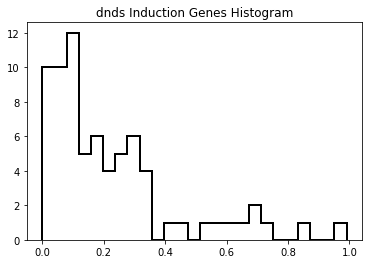

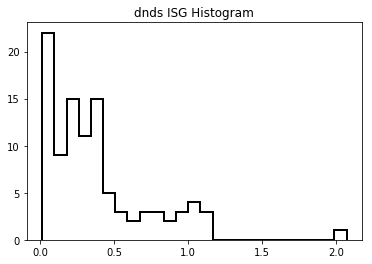

In [6]:

#dnds_vals = [_ for _ in np.nan_to_num(np.array(df['dN/dS M0'])) if _!=0]
dnds_Induction = df_Induction['M0']
dnds_ISG = df_ISG['M0']
plt.hist(dnds_Induction,bins=25,histtype='step',lw=2,color='k')
plt.title('dnds Induction Genes Histogram')
plt.show()

plt.hist(dnds_ISG,bins=25,histtype='step',lw=2,color='k')
plt.title('dnds ISG Histogram')
plt.show()

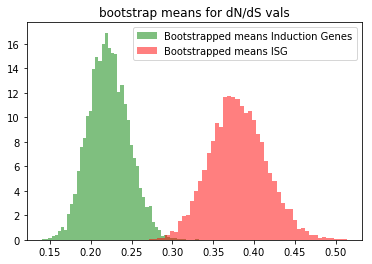

In [12]:

def bootstrap_samples_mean(array,nsamples=100):
    bootstrap_array = []
    for _ in range(nsamples):
        bootstrap_array.append(np.mean(np.random.choice(array,len(array),replace=True)))
    return bootstrap_array


bootstrap_mean_Induction = bootstrap_samples_mean(dnds_Induction,10000)
bootstrap_mean_ISG = bootstrap_samples_mean(dnds_ISG,10000)
plt.hist(bootstrap_mean_Induction,bins=50,color='green',alpha=0.5,label='Bootstrapped means Induction Genes',normed=True)
plt.hist(bootstrap_mean_ISG,bins=50,color='red',alpha=0.5,label='Bootstrapped means ISG',normed=True)


plt.title('bootstrap means for dN/dS vals')
#plt.axvline(np.mean(dnds_vals),color='k',lw)
plt.legend()
plt.savefig('../Figures/bootstrap_mean_histograms3.pdf')
plt.show()


In [13]:
false_pos_rate = len([_ for _ in bootstrap_mean_ISG if _ < max(bootstrap_mean_Induction)])/float(len(bootstrap_mean_ISG))
false_neg_rate = len([_ for _ in bootstrap_mean_Induction if _ > min(bootstrap_mean_ISG)])/float(len(bootstrap_mean_Induction))

In [14]:
print false_neg_rate, false_pos_rate

0.0592 0.0766


In [16]:
# perform kolmogrov-smirnov test to test whether or not the two dNdS distributions are different:

sps.ks_2samp(dnds_Induction,dnds_ISG)

Ks_2sampResult(statistic=0.27668520276685199, pvalue=0.0023102558993522231)